In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Load the datasets
train_data = '/Users/adityadeshpande/Desktop/DLF/Assignment 3/archive/Google_Stock_Price_Train.csv'
test_data = '/Users/adityadeshpande/Desktop/DLF/Assignment 3/archive/Google_Stock_Price_Test.csv'

train_data = pd.read_csv(train_data)
test_data = pd.read_csv(test_data)

In [3]:
train_data.head(10)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [4]:
train_data.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [5]:
test_data.head(10)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [6]:
test_data.describe()

,Open,High,Low,Close
count,20.000000,20.000000,20.000000,20.000000
mean,807.526000,811.926500,801.949500,807.904500
std,15.125428,14.381198,13.278607,13.210088
min,778.810000,789.630000,775.800000,786.140000
25%,802.965000,806.735000,797.427500,802.282500
50%,806.995000,808.640000,801.530000,806.110000
75%,809.560000,817.097500,804.477500,810.760000
max,837.810000,841.950000,827.010000,835.670000


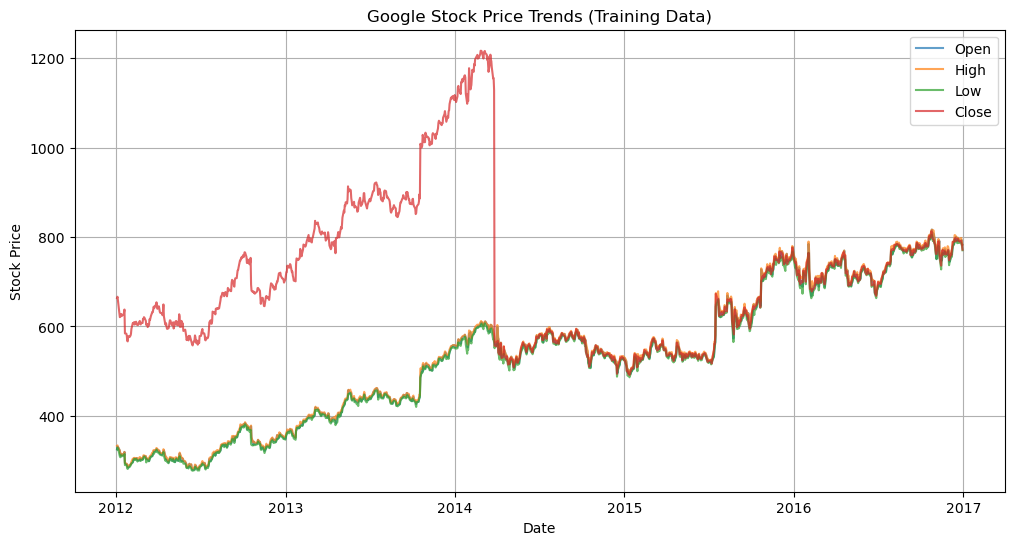

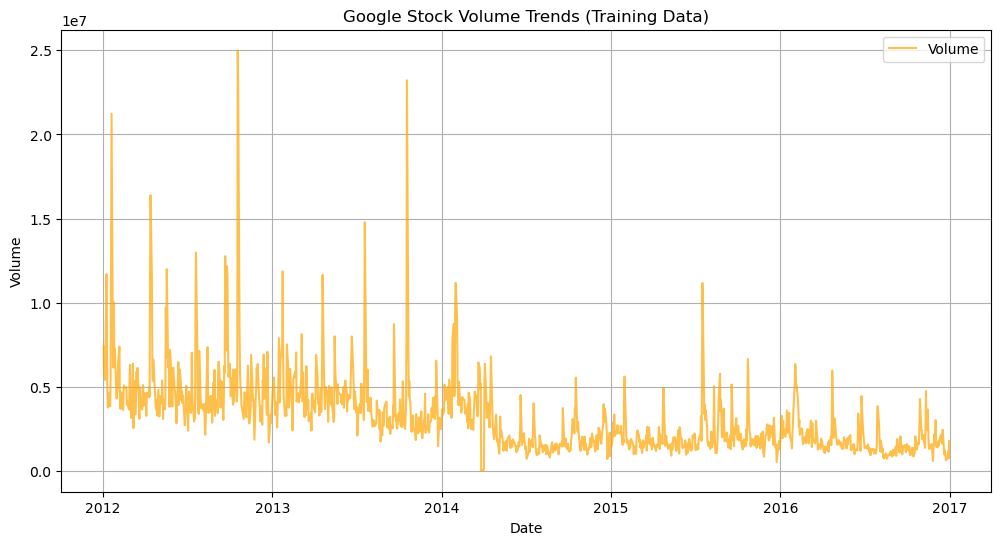

In [7]:
# Clean the training dataset
train_data['Close'] = train_data['Close'].astype(str).str.replace(',', '').astype(float)
train_data['Volume'] = train_data['Volume'].astype(str).str.replace(',', '').astype(float)
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Plot the stock price trends (Open, High, Low, Close)
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Open'], label='Open', alpha=0.7)
plt.plot(train_data['Date'], train_data['High'], label='High', alpha=0.7)
plt.plot(train_data['Date'], train_data['Low'], label='Low', alpha=0.7)
plt.plot(train_data['Date'], train_data['Close'], label='Close', alpha=0.7)
plt.title('Google Stock Price Trends (Training Data)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot the volume trends
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Volume'], label='Volume', color='orange', alpha=0.7)
plt.title('Google Stock Volume Trends (Training Data)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

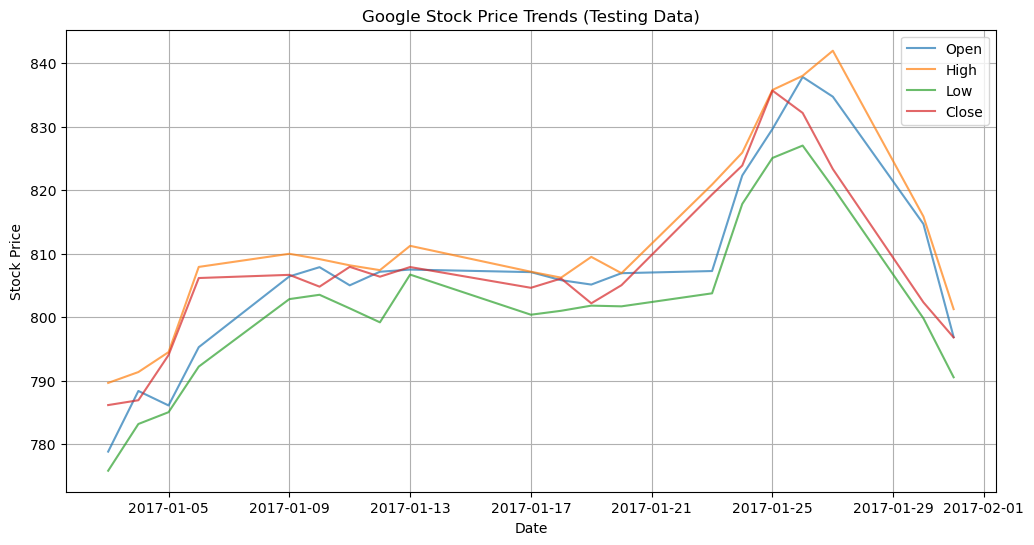

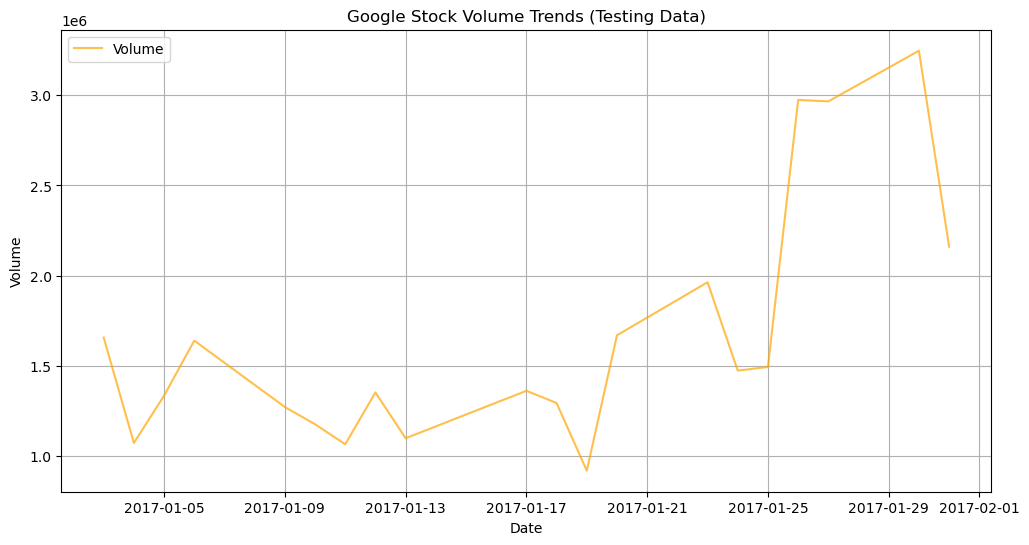

In [8]:
# Clean the testing dataset
test_data['Close'] = test_data['Close'].astype(str).str.replace(',', '').astype(float)
test_data['Volume'] = test_data['Volume'].astype(str).str.replace(',', '').astype(float)

test_data['Date'] = pd.to_datetime(test_data['Date'])

# Plot the stock price trends (Open, High, Low, Close) for testing data
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Open'], label='Open', alpha=0.7)
plt.plot(test_data['Date'], test_data['High'], label='High', alpha=0.7)
plt.plot(test_data['Date'], test_data['Low'], label='Low', alpha=0.7)
plt.plot(test_data['Date'], test_data['Close'], label='Close', alpha=0.7)
plt.title('Google Stock Price Trends (Testing Data)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot the volume trends for testing data
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Volume'], label='Volume', color='orange', alpha=0.7)
plt.title('Google Stock Volume Trends (Testing Data)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Normalize the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['Open', 'High', 'Low', 'Close', 'Volume']])
test_scaled = scaler.transform(test_data[['Open', 'High', 'Low', 'Close', 'Volume']])

# Define sequence length N and prediction horizon M
N = 10  # Use past days
M = 1   # Predict 1 future day 

# Function to create sequences
def create_sequences(data, sequence_length, prediction_length):
    X, y = [], []
    for i in range(len(data) - sequence_length - prediction_length + 1):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length:i + sequence_length + prediction_length])
    return np.array(X), np.array(y)

# Split train data into training and validation sets
X_train_full, y_train_full = create_sequences(train_scaled, N, M)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Prepare test data
X_test, y_test = create_sequences(test_scaled, N, M)

In [10]:
# Define and Train Models
def build_rnn(input_shape):
    model = Sequential([
        SimpleRNN(50, activation='tanh', return_sequences=False, input_shape=input_shape),
        Dense(M * 5),  # Output size matches the number of features * prediction length
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

def build_lstm(input_shape):
    model = Sequential([
        LSTM(50, activation='tanh', return_sequences=False, input_shape=input_shape),
        Dense(M * 5),  # Output size matches the number of features * prediction length
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

In [11]:
# Train RNN
rnn_model = build_rnn((N, 5))
history_rnn = rnn_model.fit(X_train, y_train.reshape(-1, M * 5), 
                            validation_data=(X_val, y_val.reshape(-1, M * 5)),
                            epochs=20, batch_size=32, verbose=1)

# Train LSTM
lstm_model = build_lstm((N, 5))
history_lstm = lstm_model.fit(X_train, y_train.reshape(-1, M * 5), 
                              validation_data=(X_val, y_val.reshape(-1, M * 5)),
                              epochs=20, batch_size=32, verbose=1)

Epoch 1/20


/Users/adityadeshpande/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1583 - val_loss: 0.0137
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0109 - val_loss: 0.0058
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 0.0022


In [12]:
# Evaluate Models

# Predict for RNN
rnn_predictions = rnn_model.predict(X_test)

# Reshape predictions to match the number of features (5) for the test set
rnn_predictions_reshaped = rnn_predictions.reshape(-1, 5)

# Calculate performance metrics for RNN
rnn_mse = mean_squared_error(y_test.reshape(-1, 5), rnn_predictions_reshaped)
rnn_mae = mean_absolute_error(y_test.reshape(-1, 5), rnn_predictions_reshaped)

# Predict for LSTM
lstm_predictions = lstm_model.predict(X_test)

# Reshape predictions to match the number of features (5) for the test set
lstm_predictions_reshaped = lstm_predictions.reshape(-1, 5)

# Calculate performance metrics for LSTM
lstm_mse = mean_squared_error(y_test.reshape(-1, 5), lstm_predictions_reshaped)
lstm_mae = mean_absolute_error(y_test.reshape(-1, 5), lstm_predictions_reshaped)

# Print the evaluation results
print("RNN Evaluation Metrics:")
print(f"RNN Mean Squared Error: {rnn_mse}")
print(f"RNN Mean Absolute Error: {rnn_mae}")

print("\nLSTM Evaluation Metrics:")
print(f"LSTM Mean Squared Error: {lstm_mse}")
print(f"LSTM Mean Absolute Error: {lstm_mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
RNN Evaluation Metrics:
RNN Mean Squared Error: 0.0012555856086481577
RNN Mean Absolute Error: 0.028243500075975054

LSTM Evaluation Metrics:
LSTM Mean Squared Error: 0.0008150659729002488
LSTM Mean Absolute Error: 0.023237380585778893


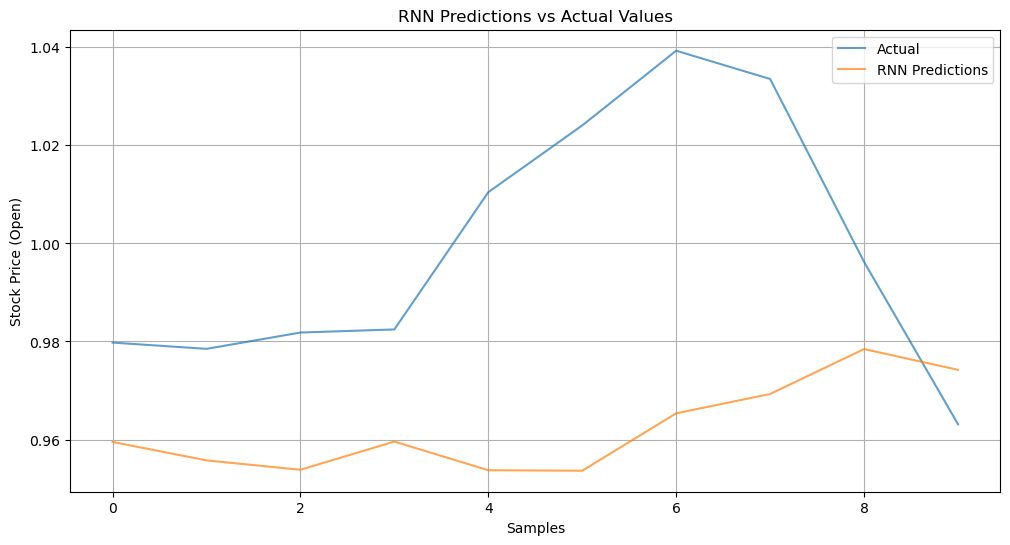

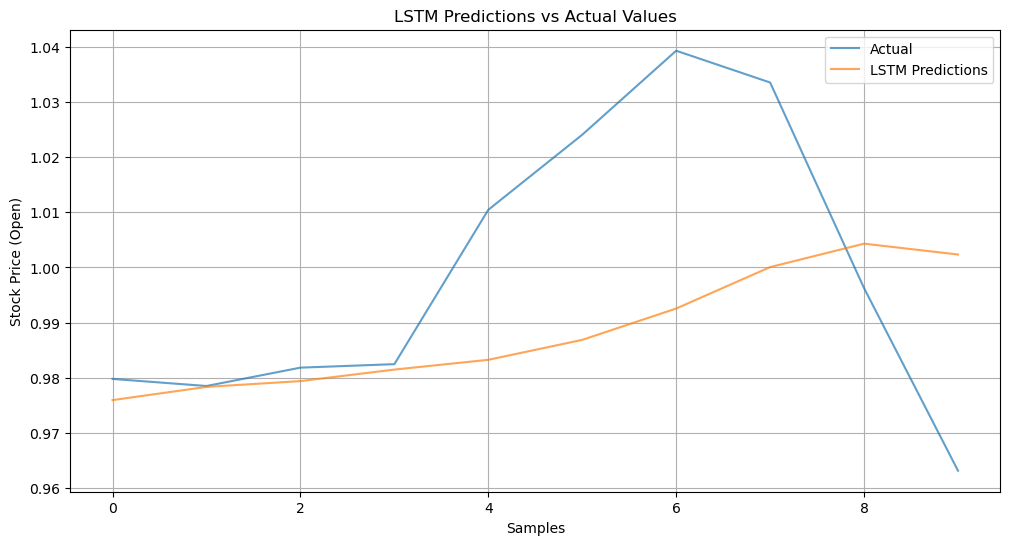

In [13]:
# Plot RNN predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.reshape(-1, 5)[:, 0], label="Actual", alpha=0.7)
plt.plot(rnn_predictions_reshaped[:, 0], label="RNN Predictions", alpha=0.7)
plt.title("RNN Predictions vs Actual Values")
plt.xlabel("Samples")
plt.ylabel("Stock Price (Open)")
plt.legend()
plt.grid(True)
plt.show()

# Plot LSTM predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.reshape(-1, 5)[:, 0], label="Actual", alpha=0.7)
plt.plot(lstm_predictions_reshaped[:, 0], label="LSTM Predictions", alpha=0.7)
plt.title("LSTM Predictions vs Actual Values")
plt.xlabel("Samples")
plt.ylabel("Stock Price (Open)")
plt.legend()
plt.grid(True)
plt.show()
